In [4]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
from mylib.adaline import AdalineGD

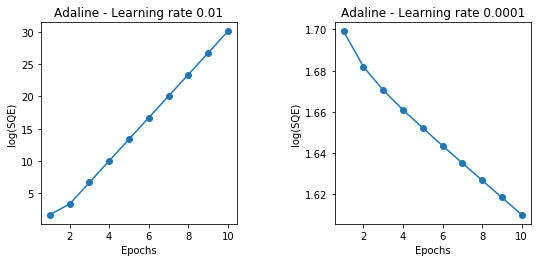

In [8]:
if __name__ == '__main__':
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa', -1, 1)
    X = df.iloc[0:100, [0, 2]].values
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # Learning rate를 0.01로 수행한 아달라인의 비용함수 J(w) 값은 계속 커짐.
    # 즉, 수렴하지 않고 발산해버림.
    adal = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
    ax[0].plot(range(1, len(adal.cost_) + 1), np.log10(adal.cost_), marker='o')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('log(SQE)')
    ax[0].set_title('Adaline - Learning rate 0.01')
    
    # 반면, Learning rate 값을 0.0001로 수행한 아달라인 비용함수 J(w)값은 
    # 계속 작아져서 어느 특정한 값에 수렴하였음.
    # 이와 같이 값이 옳게 수렴하지 못하는 경우를 없애기 위해
    # 정규분포에서 사용되는 표준화(standardization)을 이용하였음. 
    adal2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)
    ax[1].plot(range(1, len(adal2.cost_) + 1), np.log10(adal2.cost_), marker='o')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('log(SQE)')
    ax[1].set_title('Adaline - Learning rate 0.0001')
    
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.9, wspace=0.5, hspace=0.5)
    
    plt.show()